[공공데이터 포털 _ 한국부동산원_오피스텔 가격동향조사_월세가격(지역별)](https://www.data.go.kr/data/15048312/fileData.do#tab-layer-file)

In [68]:
# 코랩 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작(세션다시시작?)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,449 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and dire

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font' , family='NanumBarunGothic')

In [2]:
from google.colab import files
import io

# 파일 업로드 대화상자 열기
uploaded = files.upload()

# Get the actual file name
file_name = list(uploaded.keys())[0]

# 업로드한 파일 확인
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='cp949') # Try 'cp949' encoding

Saving 한국부동산원_오피스텔 가격동향조사_월세가격(규모별)_20231231.csv to 한국부동산원_오피스텔 가격동향조사_월세가격(규모별)_20231231.csv


In [3]:
# 데이터 확인
df.head()

,지역_규모,2020-07(평균월세보증금),2020-07(평균월세가격),2020-07(중위월세보증금),2020-07(중위월세가격),2020-08(평균월세보증금),2020-08(평균월세가격),2020-08(중위월세보증금),2020-08(중위월세가격),2020-09(평균월세보증금),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
0,전국_40㎡이하,8171.0,517.0,7126.0,505.0,8171.0,517.0,7126.0,507.0,8171.0,...,7126.0,525.0,8075.0,539.0,7126.0,526.0,8111.0,539.0,7126.0,525.0
1,전국_40㎡초과 60㎡이하,13176.0,748.0,10261.0,723.0,13171.0,748.0,10261.0,723.0,13153.0,...,10261.0,742.0,12944.0,771.0,10261.0,741.0,12909.0,771.0,10261.0,741.0
2,전국_60㎡초과 85㎡이하,26006.0,918.0,20544.0,868.0,26024.0,919.0,20544.0,868.0,26070.0,...,21348.0,905.0,28152.0,962.0,21348.0,907.0,28142.0,962.0,21348.0,909.0
3,전국_85㎡초과,51214.0,1811.0,38641.0,1619.0,51043.0,1813.0,38641.0,1619.0,51028.0,...,39276.0,1631.0,55181.0,1851.0,39276.0,1632.0,55166.0,1852.0,39276.0,1631.0
4,수도권_40㎡이하,8531.0,553.0,7679.0,540.0,8531.0,553.0,7679.0,542.0,8531.0,...,7679.0,562.0,8498.0,578.0,7679.0,562.0,8516.0,579.0,7679.0,562.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 169 entries, 지역_규모 to 2023-12(중위월세가격)
dtypes: float64(168), object(1)
memory usage: 87.3+ KB


In [5]:
# '지역_규모' 열에서 '서울'이 포함된 행만 선택
filtered_df = df[df['지역_규모'].str.contains('서울', na=False)]

# 필터링된 데이터 확인
filtered_df.head()

,지역_규모,2020-07(평균월세보증금),2020-07(평균월세가격),2020-07(중위월세보증금),2020-07(중위월세가격),2020-08(평균월세보증금),2020-08(평균월세가격),2020-08(중위월세보증금),2020-08(중위월세가격),2020-09(평균월세보증금),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
12,서울 40㎡이하,9896.0,630.0,10000.0,616.0,9896.0,631.0,10000.0,616.0,9896.0,...,10000.0,632.0,10043.0,650.0,10000.0,632.0,10077.0,650.0,10000.0,632.0
13,서울 40㎡초과 60㎡이하,15118.0,968.0,11487.0,960.0,15104.0,968.0,11487.0,960.0,15037.0,...,11487.0,996.0,14856.0,992.0,11487.0,997.0,14856.0,992.0,11487.0,997.0
14,서울 60㎡초과 85㎡이하,38589.0,1233.0,25155.0,1165.0,38700.0,1234.0,25155.0,1165.0,38987.0,...,25155.0,1201.0,40019.0,1269.0,25155.0,1200.0,40019.0,1268.0,25155.0,1199.0
15,서울 85㎡초과,94109.0,2559.0,59960.0,2091.0,94109.0,2559.0,59960.0,2091.0,94111.0,...,59894.0,2083.0,105209.0,2586.0,59894.0,2083.0,105209.0,2587.0,59894.0,2081.0
16,서울 도심권_40㎡이하,10870.0,753.0,10000.0,750.0,10870.0,752.0,10000.0,750.0,10870.0,...,10000.0,759.0,10761.0,783.0,10000.0,759.0,10761.0,784.0,10000.0,759.0


In [6]:
# 결측치 확인
print(filtered_df.isnull().sum())

지역_규모               0
2020-07(평균월세보증금)    0
2020-07(평균월세가격)     0
2020-07(중위월세보증금)    0
2020-07(중위월세가격)     0
                   ..
2023-11(중위월세가격)     0
2023-12(평균월세보증금)    0
2023-12(평균월세가격)     0
2023-12(중위월세보증금)    0
2023-12(중위월세가격)     0
Length: 169, dtype: int64


In [7]:
# # '중위월세보증금' 단어가 포함된 컬럼 찾기
# columns_to_drop = [col for col in filtered_df.columns if '중위월세보증금' in col]

# # 해당 컬럼 삭제
# filtered_df.drop(columns=columns_to_drop, inplace=True)

# # 변경된 데이터프레임 확인
# filtered_df.head()

In [8]:
# # '중위월세가격' 단어가 포함된 컬럼 찾기
# columns_to_drop = [col for col in filtered_df.columns if '중위월세가격' in col]

# # 해당 컬럼 삭제
# filtered_df.drop(columns=columns_to_drop, inplace=True)

# # 변경된 데이터프레임 확인
# filtered_df.head()

In [9]:
# 삭제할 컬럼 이름을 찾기
columns_to_drop = [col for col in filtered_df.columns if '중위월세보증금' in col or '중위월세가격' in col]

In [10]:
filtered_df.columns.tolist()

['지역_규모',
 '2020-07(평균월세보증금)',
 '2020-07(평균월세가격)',
 '2020-07(중위월세보증금)',
 '2020-07(중위월세가격)',
 '2020-08(평균월세보증금)',
 '2020-08(평균월세가격)',
 '2020-08(중위월세보증금)',
 '2020-08(중위월세가격)',
 '2020-09(평균월세보증금)',
 '2020-09(평균월세가격)',
 '2020-09(중위월세보증금)',
 '2020-09(중위월세가격)',
 '2020-10(평균월세보증금)',
 '2020-10(평균월세가격)',
 '2020-10(중위월세보증금)',
 '2020-10(중위월세가격)',
 '2020-11(평균월세보증금)',
 '2020-11(평균월세가격)',
 '2020-11(중위월세보증금)',
 '2020-11(중위월세가격)',
 '2020-12(평균월세보증금)',
 '2020-12(평균월세가격)',
 '2020-12(중위월세보증금)',
 '2020-12(중위월세가격)',
 '2021-01(평균월세보증금)',
 '2021-01(평균월세가격)',
 '2021-01(중위월세보증금)',
 '2021-01(중위월세가격)',
 '2021-02(평균월세보증금)',
 '2021-02(평균월세가격)',
 '2021-02(중위월세보증금)',
 '2021-02(중위월세가격)',
 '2021-03(평균월세보증금)',
 '2021-03(평균월세가격)',
 '2021-03(중위월세보증금)',
 '2021-03(중위월세가격)',
 '2021-04(평균월세보증금)',
 '2021-04(평균월세가격)',
 '2021-04(중위월세보증금)',
 '2021-04(중위월세가격)',
 '2021-05(평균월세보증금)',
 '2021-05(평균월세가격)',
 '2021-05(중위월세보증금)',
 '2021-05(중위월세가격)',
 '2021-06(평균월세보증금)',
 '2021-06(평균월세가격)',
 '2021-06(중위월세보증금)',
 '2021-06(중위월세가격)',
 '2021

In [15]:
filtered_df.head()

,지역_규모,2020-07(평균월세보증금),2020-07(평균월세가격),2020-07(중위월세보증금),2020-07(중위월세가격),2020-08(평균월세보증금),2020-08(평균월세가격),2020-08(중위월세보증금),2020-08(중위월세가격),2020-09(평균월세보증금),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
12,서울 40㎡이하,9896.0,630.0,10000.0,616.0,9896.0,631.0,10000.0,616.0,9896.0,...,10000.0,632.0,10043.0,650.0,10000.0,632.0,10077.0,650.0,10000.0,632.0
13,서울 40㎡초과 60㎡이하,15118.0,968.0,11487.0,960.0,15104.0,968.0,11487.0,960.0,15037.0,...,11487.0,996.0,14856.0,992.0,11487.0,997.0,14856.0,992.0,11487.0,997.0
14,서울 60㎡초과 85㎡이하,38589.0,1233.0,25155.0,1165.0,38700.0,1234.0,25155.0,1165.0,38987.0,...,25155.0,1201.0,40019.0,1269.0,25155.0,1200.0,40019.0,1268.0,25155.0,1199.0
15,서울 85㎡초과,94109.0,2559.0,59960.0,2091.0,94109.0,2559.0,59960.0,2091.0,94111.0,...,59894.0,2083.0,105209.0,2586.0,59894.0,2083.0,105209.0,2587.0,59894.0,2081.0
16,서울 도심권_40㎡이하,10870.0,753.0,10000.0,750.0,10870.0,752.0,10000.0,750.0,10870.0,...,10000.0,759.0,10761.0,783.0,10000.0,759.0,10761.0,784.0,10000.0,759.0


In [33]:
# '지역_규모' 열에서 '서울'이 포함된 행만 선택
filtered_df = df[df['지역_규모'].str.contains('서울', na=False)]

# '2023'이 포함된 컬럼만 선택
columns_2023 = [col for col in filtered_df.columns if '2023' in col]

# '지역_규모' 열을 포함한 모든 컬럼 목록 생성
columns_to_keep = ['지역_규모'] + columns_2023

# '2023'이 포함된 컬럼과 '지역_규모' 열만 포함된 데이터프레임 생성
df_2023 = filtered_df[columns_to_keep]

# 결과 확인
df_2023.head()

,지역_규모,2023-01(평균월세보증금),2023-01(평균월세가격),2023-01(중위월세보증금),2023-01(중위월세가격),2023-02(평균월세보증금),2023-02(평균월세가격),2023-02(중위월세보증금),2023-02(중위월세가격),2023-03(평균월세보증금),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
12,서울 40㎡이하,9958.0,644.0,10000.0,630.0,9958.0,645.0,10000.0,629.0,9954.0,...,10000.0,632.0,10043.0,650.0,10000.0,632.0,10077.0,650.0,10000.0,632.0
13,서울 40㎡초과 60㎡이하,14860.0,988.0,11487.0,994.0,14860.0,988.0,11487.0,995.0,14860.0,...,11487.0,996.0,14856.0,992.0,11487.0,997.0,14856.0,992.0,11487.0,997.0
14,서울 60㎡초과 85㎡이하,40095.0,1264.0,25155.0,1194.0,40095.0,1264.0,25155.0,1194.0,40095.0,...,25155.0,1201.0,40019.0,1269.0,25155.0,1200.0,40019.0,1268.0,25155.0,1199.0
15,서울 85㎡초과,107009.0,2573.0,59960.0,2148.0,104913.0,2582.0,59960.0,2145.0,105425.0,...,59894.0,2083.0,105209.0,2586.0,59894.0,2083.0,105209.0,2587.0,59894.0,2081.0
16,서울 도심권_40㎡이하,10783.0,772.0,10000.0,738.0,10783.0,773.0,10000.0,738.0,10783.0,...,10000.0,759.0,10761.0,783.0,10000.0,759.0,10761.0,784.0,10000.0,759.0


In [34]:
# '지역_규모' 열을 인덱스로 설정
df_2023.set_index('지역_규모', inplace=True)
df_2023.head()

,2023-01(평균월세보증금),2023-01(평균월세가격),2023-01(중위월세보증금),2023-01(중위월세가격),2023-02(평균월세보증금),2023-02(평균월세가격),2023-02(중위월세보증금),2023-02(중위월세가격),2023-03(평균월세보증금),2023-03(평균월세가격),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
지역_규모,,,,,,,,,,,,,,,,,,,,,
서울 40㎡이하,9958.0,644.0,10000.0,630.0,9958.0,645.0,10000.0,629.0,9954.0,645.0,...,10000.0,632.0,10043.0,650.0,10000.0,632.0,10077.0,650.0,10000.0,632.0
서울 40㎡초과 60㎡이하,14860.0,988.0,11487.0,994.0,14860.0,988.0,11487.0,995.0,14860.0,989.0,...,11487.0,996.0,14856.0,992.0,11487.0,997.0,14856.0,992.0,11487.0,997.0
서울 60㎡초과 85㎡이하,40095.0,1264.0,25155.0,1194.0,40095.0,1264.0,25155.0,1194.0,40095.0,1264.0,...,25155.0,1201.0,40019.0,1269.0,25155.0,1200.0,40019.0,1268.0,25155.0,1199.0
서울 85㎡초과,107009.0,2573.0,59960.0,2148.0,104913.0,2582.0,59960.0,2145.0,105425.0,2581.0,...,59894.0,2083.0,105209.0,2586.0,59894.0,2083.0,105209.0,2587.0,59894.0,2081.0
서울 도심권_40㎡이하,10783.0,772.0,10000.0,738.0,10783.0,773.0,10000.0,738.0,10783.0,773.0,...,10000.0,759.0,10761.0,783.0,10000.0,759.0,10761.0,784.0,10000.0,759.0


In [35]:
# '평균월세보증금'과 '평균월세가격'이 포함된 컬럼 찾기
deposit_columns = [col for col in df_2023.columns if '평균월세보증금' in col]
rent_columns = [col for col in df_2023.columns if '평균월세가격' in col]

# 선택된 컬럼으로 새로운 데이터프레임 생성
selected_columns = deposit_columns + rent_columns
df_filtered = df_2023[selected_columns]

# 결과 데이터프레임 확인
df_filtered.head()

,2023-01(평균월세보증금),2023-02(평균월세보증금),2023-03(평균월세보증금),2023-04(평균월세보증금),2023-05(평균월세보증금),2023-06(평균월세보증금),2023-07(평균월세보증금),2023-08(평균월세보증금),2023-09(평균월세보증금),2023-10(평균월세보증금),...,2023-03(평균월세가격),2023-04(평균월세가격),2023-05(평균월세가격),2023-06(평균월세가격),2023-07(평균월세가격),2023-08(평균월세가격),2023-09(평균월세가격),2023-10(평균월세가격),2023-11(평균월세가격),2023-12(평균월세가격)
지역_규모,,,,,,,,,,,,,,,,,,,,,
서울 40㎡이하,9958.0,9958.0,9954.0,10041.0,10044.0,10045.0,10044.0,10044.0,10043.0,10043.0,...,645.0,647.0,648.0,648.0,649.0,649.0,649.0,649.0,650.0,650.0
서울 40㎡초과 60㎡이하,14860.0,14860.0,14860.0,14863.0,14863.0,14856.0,14856.0,14856.0,14856.0,14856.0,...,989.0,989.0,990.0,991.0,992.0,992.0,992.0,993.0,992.0,992.0
서울 60㎡초과 85㎡이하,40095.0,40095.0,40095.0,40095.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,...,1264.0,1263.0,1265.0,1266.0,1267.0,1268.0,1268.0,1269.0,1269.0,1268.0
서울 85㎡초과,107009.0,104913.0,105425.0,105255.0,105235.0,105230.0,105220.0,105220.0,105244.0,105244.0,...,2581.0,2581.0,2580.0,2580.0,2580.0,2580.0,2582.0,2582.0,2586.0,2587.0
서울 도심권_40㎡이하,10783.0,10783.0,10783.0,10761.0,10761.0,10761.0,10761.0,10761.0,10761.0,10761.0,...,773.0,778.0,778.0,779.0,780.0,780.0,780.0,781.0,783.0,784.0


In [41]:
df_filtered.index

Index(['서울 40㎡이하', '서울 40㎡초과 60㎡이하', '서울 60㎡초과 85㎡이하', '서울 85㎡초과',
       '서울 도심권_40㎡이하', '서울 도심권_40㎡초과 60㎡이하', '서울 도심권_60㎡초과 85㎡이하',
       '서울 도심권_85㎡초과', '서울 동북권_40㎡이하', '서울 동북권_40㎡초과 60㎡이하',
       '서울 동북권_60㎡초과 85㎡이하', '서울 동북권_85㎡초과', '서울 서북권_40㎡이하',
       '서울 서북권_40㎡초과 60㎡이하', '서울 서북권_60㎡초과 85㎡이하', '서울 서북권_85㎡초과',
       '서울 서남권_40㎡이하', '서울 서남권_40㎡초과 60㎡이하', '서울 서남권_60㎡초과 85㎡이하',
       '서울 서남권_85㎡초과', '서울 동남권_40㎡이하', '서울 동남권_40㎡초과 60㎡이하',
       '서울 동남권_60㎡초과 85㎡이하', '서울 동남권_85㎡초과'],
      dtype='object', name='지역_규모')

In [42]:
# 필터링할 인덱스 값들
target_indices = ['서울 40㎡이하', '서울 40㎡초과 60㎡이하', '서울 60㎡초과 85㎡이하', '서울 85㎡초과']

# 인덱스가 필터링할 값들에 해당하는 데이터만 선택
filtered_df = df_filtered.loc[df_filtered.index.isin(target_indices)]

# 결과 데이터프레임 확인
filtered_df

,2023-01(평균월세보증금),2023-02(평균월세보증금),2023-03(평균월세보증금),2023-04(평균월세보증금),2023-05(평균월세보증금),2023-06(평균월세보증금),2023-07(평균월세보증금),2023-08(평균월세보증금),2023-09(평균월세보증금),2023-10(평균월세보증금),...,2023-03(평균월세가격),2023-04(평균월세가격),2023-05(평균월세가격),2023-06(평균월세가격),2023-07(평균월세가격),2023-08(평균월세가격),2023-09(평균월세가격),2023-10(평균월세가격),2023-11(평균월세가격),2023-12(평균월세가격)
지역_규모,,,,,,,,,,,,,,,,,,,,,
서울 40㎡이하,9958.0,9958.0,9954.0,10041.0,10044.0,10045.0,10044.0,10044.0,10043.0,10043.0,...,645.0,647.0,648.0,648.0,649.0,649.0,649.0,649.0,650.0,650.0
서울 40㎡초과 60㎡이하,14860.0,14860.0,14860.0,14863.0,14863.0,14856.0,14856.0,14856.0,14856.0,14856.0,...,989.0,989.0,990.0,991.0,992.0,992.0,992.0,993.0,992.0,992.0
서울 60㎡초과 85㎡이하,40095.0,40095.0,40095.0,40095.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,...,1264.0,1263.0,1265.0,1266.0,1267.0,1268.0,1268.0,1269.0,1269.0,1268.0
서울 85㎡초과,107009.0,104913.0,105425.0,105255.0,105235.0,105230.0,105220.0,105220.0,105244.0,105244.0,...,2581.0,2581.0,2580.0,2580.0,2580.0,2580.0,2582.0,2582.0,2586.0,2587.0


In [64]:
# 월별 컬럼을 포함한 데이터프레임으로 가정 (실제 컬럼 이름과 포맷에 맞게 수정 필요)
# '평균월세보증금'과 '평균월세가격'이 포함된 컬럼 찾기
deposit_columns = [col for col in filtered_df.columns if '평균월세보증금' in col]
rent_columns = [col for col in filtered_df.columns if '평균월세가격' in col]

# 월별 데이터프레임 생성
df_monthly_deposit = filtered_df[deposit_columns]
df_monthly_rent = filtered_df[rent_columns]

In [89]:
df_monthly_deposit

,2023-01(평균월세보증금),2023-02(평균월세보증금),2023-03(평균월세보증금),2023-04(평균월세보증금),2023-05(평균월세보증금),2023-06(평균월세보증금),2023-07(평균월세보증금),2023-08(평균월세보증금),2023-09(평균월세보증금),2023-10(평균월세보증금),2023-11(평균월세보증금),2023-12(평균월세보증금)
지역_규모,,,,,,,,,,,,
서울 40㎡이하,9958.0,9958.0,9954.0,10041.0,10044.0,10045.0,10044.0,10044.0,10043.0,10043.0,10043.0,10077.0
서울 40㎡초과 60㎡이하,14860.0,14860.0,14860.0,14863.0,14863.0,14856.0,14856.0,14856.0,14856.0,14856.0,14856.0,14856.0
서울 60㎡초과 85㎡이하,40095.0,40095.0,40095.0,40095.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0
서울 85㎡초과,107009.0,104913.0,105425.0,105255.0,105235.0,105230.0,105220.0,105220.0,105244.0,105244.0,105209.0,105209.0


### 평균월세 보증금 컬럼

In [92]:
# 현재 컬럼명 확인
print("변경 전 컬럼명:")
df_monthly_deposit.columns

변경 전 컬럼명:


Index(['2023-01(평균월세보증금)', '2023-02(평균월세보증금)', '2023-03(평균월세보증금)',
       '2023-04(평균월세보증금)', '2023-05(평균월세보증금)', '2023-06(평균월세보증금)',
       '2023-07(평균월세보증금)', '2023-08(평균월세보증금)', '2023-09(평균월세보증금)',
       '2023-10(평균월세보증금)', '2023-11(평균월세보증금)', '2023-12(평균월세보증금)'],
      dtype='object')

In [93]:
# '평균월세보증금' 단어를 ''으로 변경하는 매핑 딕셔너리 생성
rename_dict1 = {col: col.replace('(평균월세보증금)', '') for col in df_monthly_deposit.columns if '평균월세보증금' in col}

# 컬럼명 변경
df_monthly_deposit_renamed = df_monthly_deposit.rename(columns=rename_dict1)

# 결과 확인
print("변경 후 컬럼명:")
df_monthly_deposit_renamed.columns

변경 후 컬럼명:


Index(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object')

In [94]:
# 월별 평균월세보증금
df_monthly_deposit_renamed

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
지역_규모,,,,,,,,,,,,
서울 40㎡이하,9958.0,9958.0,9954.0,10041.0,10044.0,10045.0,10044.0,10044.0,10043.0,10043.0,10043.0,10077.0
서울 40㎡초과 60㎡이하,14860.0,14860.0,14860.0,14863.0,14863.0,14856.0,14856.0,14856.0,14856.0,14856.0,14856.0,14856.0
서울 60㎡초과 85㎡이하,40095.0,40095.0,40095.0,40095.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0,40019.0
서울 85㎡초과,107009.0,104913.0,105425.0,105255.0,105235.0,105230.0,105220.0,105220.0,105244.0,105244.0,105209.0,105209.0


### 평균월세가격 컬럼

In [96]:
df_monthly_rent

# '평균월세가격' 단어를 ''으로 변경하는 매핑 딕셔너리 생성
rename_dict2 = {col: col.replace('(평균월세가격)', '') for col in df_monthly_rent.columns if '평균월세가격' in col}

# 컬럼명 변경
df_monthly_rent_renamed = df_monthly_rent.rename(columns=rename_dict2)

# 결과 확인
print("변경 후 컬럼명:")
df_monthly_rent_renamed.columns

변경 후 컬럼명:


Index(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype='object')

In [97]:
# 월별 평균월세가격
df_monthly_rent_renamed

,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
지역_규모,,,,,,,,,,,,
서울 40㎡이하,644.0,645.0,645.0,647.0,648.0,648.0,649.0,649.0,649.0,649.0,650.0,650.0
서울 40㎡초과 60㎡이하,988.0,988.0,989.0,989.0,990.0,991.0,992.0,992.0,992.0,993.0,992.0,992.0
서울 60㎡초과 85㎡이하,1264.0,1264.0,1264.0,1263.0,1265.0,1266.0,1267.0,1268.0,1268.0,1269.0,1269.0,1268.0
서울 85㎡초과,2573.0,2582.0,2581.0,2581.0,2580.0,2580.0,2580.0,2580.0,2582.0,2582.0,2586.0,2587.0


### 평균월세보증금 시각화

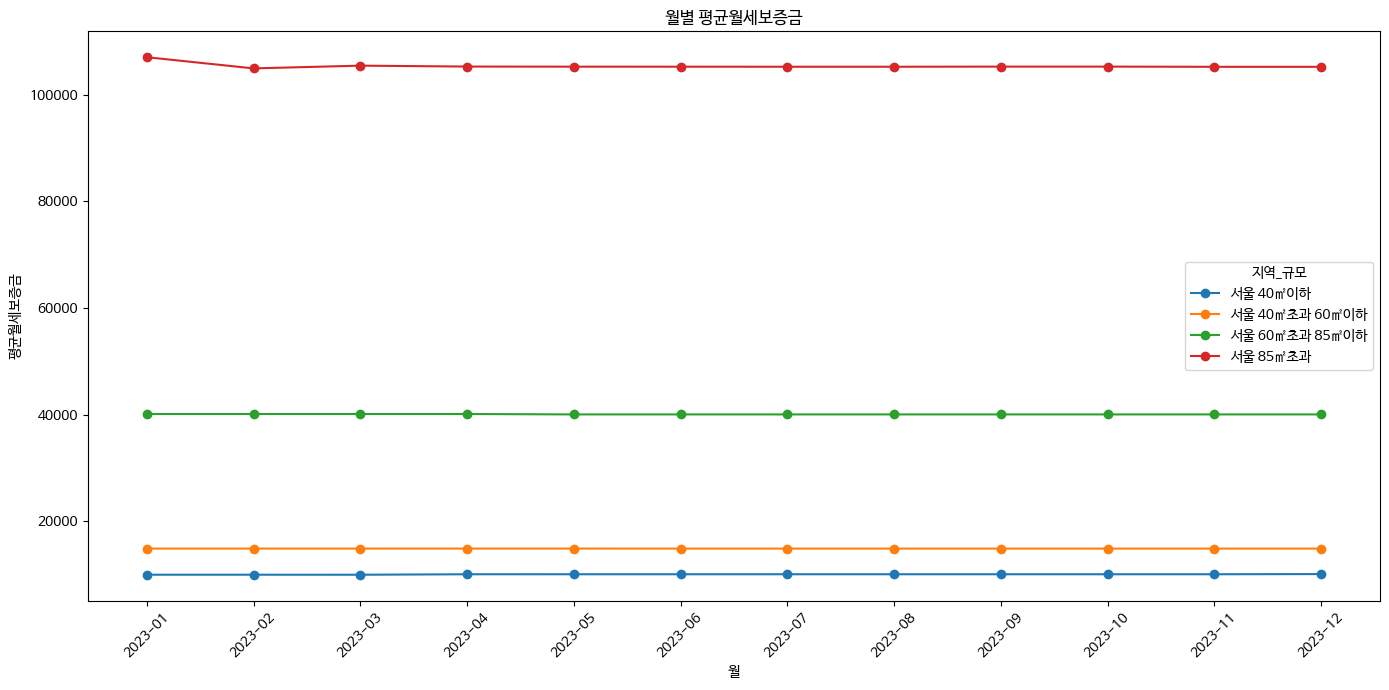

In [107]:
import matplotlib.pyplot as plt

# 월별 데이터프레임의 컬럼 이름을 x축 레이블로 설정
x_labels = df_monthly_deposit_renamed.columns

# 시각화 설정
fig, ax = plt.subplots(figsize=(14, 7))

# 각 지역별 평균 월세 보증금을 선 그래프로 시각화
for region in df_monthly_deposit_renamed.index:
    ax.plot(x_labels, df_monthly_deposit_renamed.loc[region], marker='o', linestyle='-', label=region)

# X축 및 Y축 레이블 설정
ax.set_xlabel('월')
ax.set_ylabel('평균월세보증금')
ax.set_title('월별 평균월세보증금')

# X축 레이블 설정
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# 범례 추가
ax.legend(title='지역_규모')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

### 평균월세가격 시각화

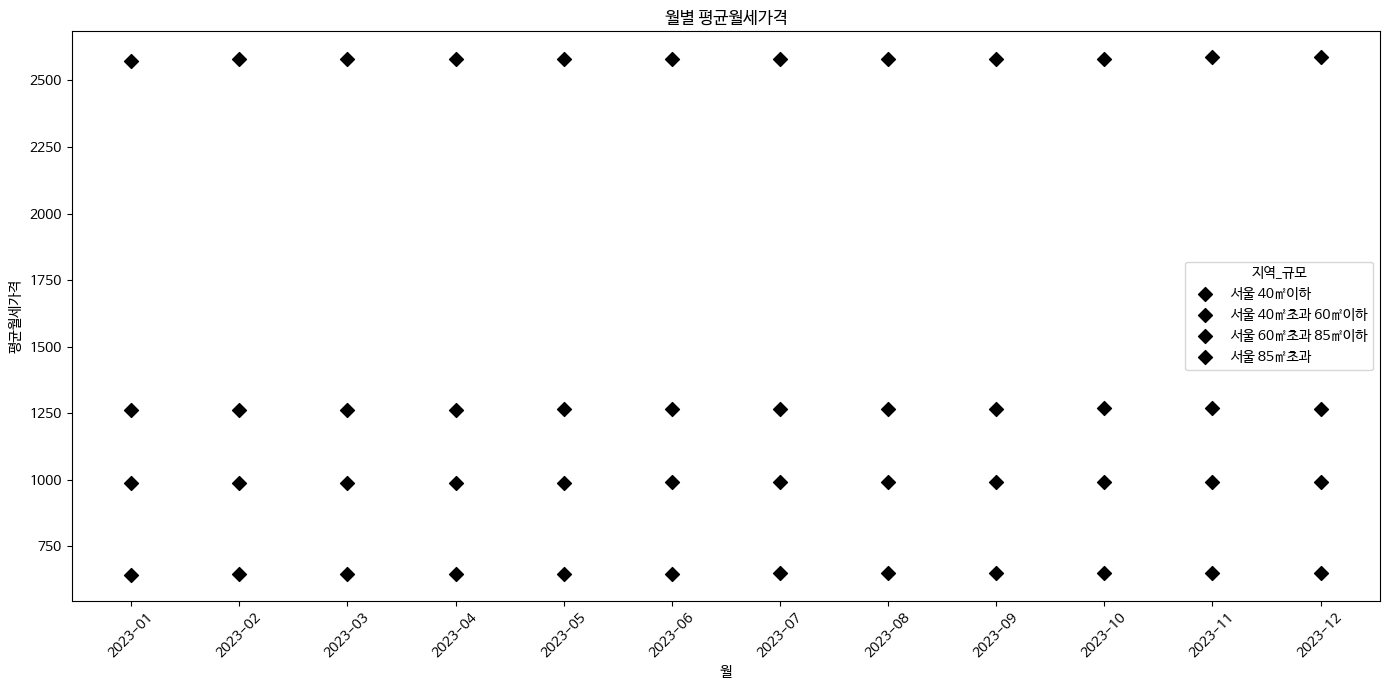

In [113]:
import matplotlib.pyplot as plt

# 월별 데이터프레임의 컬럼 이름을 x축 레이블로 설정
x_labels = df_monthly_rent_renamed.columns

# 시각화 설정
fig, ax = plt.subplots(figsize=(14, 7))

# 각 지역별 평균 월세 가격을 산점도로 시각화
for region in df_monthly_rent_renamed.index:
    ax.scatter(x_labels, df_monthly_rent_renamed.loc[region],
               marker='D', color='black', s=50, label=region)

# X축 및 Y축 레이블 설정
ax.set_xlabel('월')
ax.set_ylabel('평균월세가격')
ax.set_title('월별 평균월세가격')

# X축 레이블 설정
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)

# 범례 추가
ax.legend(title='지역_규모')

# 그래프 레이아웃 조정
plt.tight_layout()


### 평균월세보증금과 평균월세가격 합치기

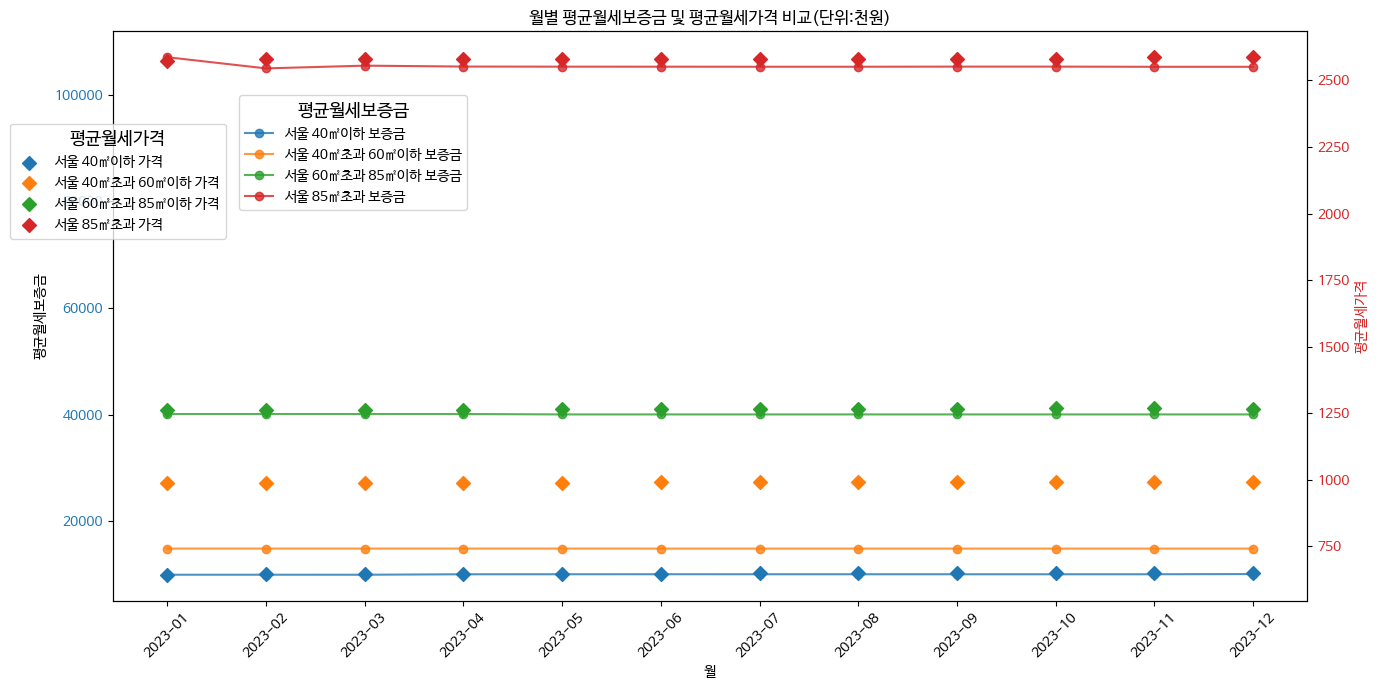

In [125]:
import matplotlib.pyplot as plt

# 월별 데이터프레임의 컬럼 이름을 x축 레이블로 설정
x_labels = df_monthly_deposit_renamed.columns

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# '평균월세보증금' 데이터를 선 그래프로 시각화
# color_deposit = 'tab:blue'
ax1.set_xlabel('월')
ax1.set_ylabel('평균월세보증금')
handles_deposit = []
labels_deposit = []


for region in df_monthly_deposit_renamed.index:
    line, = ax1.plot(x_labels, df_monthly_deposit_renamed.loc[region], marker='o', linestyle='-', alpha=0.8, label=f'{region} 보증금')
    handles_deposit.append(line)
    labels_deposit.append(f'{region} 보증금')

# X축 레이블 설정
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)
ax1.tick_params(axis='y', labelcolor=color_deposit)

# '평균월세가격' 데이터를 산점도로 시각화 (두 번째 Y축)
ax2 = ax1.twinx()
color_rent = 'tab:red'
ax2.set_ylabel('평균월세가격', color=color_rent)
handles_rent = []
labels_rent = []

for region in df_monthly_rent_renamed.index:
    scatter = ax2.scatter(x_labels, df_monthly_rent_renamed.loc[region], marker='D', s=50, label=f'{region} 가격')
    handles_rent.append(scatter)
    labels_rent.append(f'{region} 가격')

ax2.tick_params(axis='y', labelcolor=color_rent)

# 범례 추가
ax1.legend(handles=handles_deposit, labels=labels_deposit, loc='upper left', bbox_to_anchor=(0.1, 0.9), title='평균월세보증금', title_fontsize='13')
ax2.legend(handles=handles_rent, labels=labels_rent, loc='upper right', bbox_to_anchor=(0.1, 0.85), title='평균월세가격', title_fontsize='13')

# 그래프 제목 및 레이아웃 조정
plt.title('월별 평균월세보증금 및 평균월세가격 비교(단위:천원)')
fig.tight_layout()
plt.show()

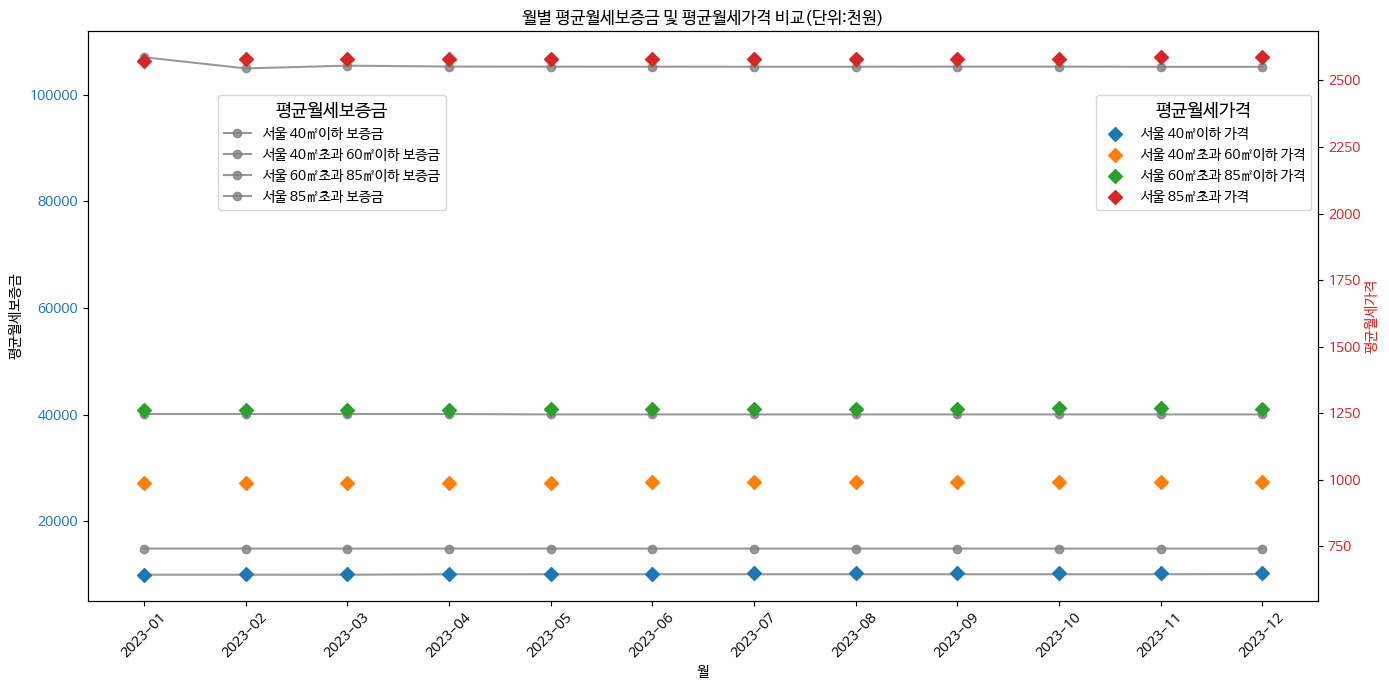

In [126]:
import matplotlib.pyplot as plt

# 월별 데이터프레임의 컬럼 이름을 x축 레이블로 설정
x_labels = df_monthly_deposit_renamed.columns

# 시각화 설정
fig, ax1 = plt.subplots(figsize=(14, 7))

# '평균월세보증금' 데이터를 선 그래프로 시각화
ax1.set_xlabel('월')
ax1.set_ylabel('평균월세보증금')
handles_deposit = []
labels_deposit = []

for region in df_monthly_deposit_renamed.index:
    line, = ax1.plot(x_labels, df_monthly_deposit_renamed.loc[region], marker='o', linestyle='-', color='gray', alpha=0.8, label=f'{region} 보증금')
    handles_deposit.append(line)
    labels_deposit.append(f'{region} 보증금')

# X축 레이블 설정
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# '평균월세가격' 데이터를 산점도로 시각화 (두 번째 Y축)
ax2 = ax1.twinx()
ax2.set_ylabel('평균월세가격', color='tab:red')
handles_rent = []
labels_rent = []

for region in df_monthly_rent_renamed.index:
    scatter = ax2.scatter(x_labels, df_monthly_rent_renamed.loc[region], marker='D', s=50, label=f'{region} 가격')
    handles_rent.append(scatter)
    labels_rent.append(f'{region} 가격')

ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례 추가
# 첫 번째 축의 범례
handles1, labels1 = ax1.get_legend_handles_labels()
# 두 번째 축의 범례
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1, labels1, loc='upper left', bbox_to_anchor=(0.1, 0.9), title='평균월세보증금', title_fontsize='13')
ax2.legend(handles2, labels2, loc='upper right', bbox_to_anchor=(1.0, 0.9), title='평균월세가격', title_fontsize='13')

# 그래프 제목 및 레이아웃 조정
plt.title('월별 평균월세보증금 및 평균월세가격 비교(단위:천원)')
fig.tight_layout()
plt.show()